In [ ]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA 1 Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

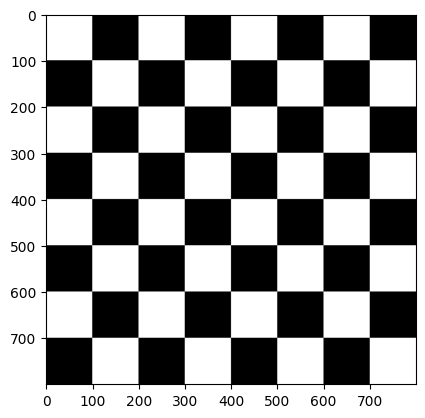

In [14]:
# Dimensiones totales de la imagen (en píxeles)
height = 800
width = 800

# Lado (en píxeles) de cada cuadrado del tablero
dim_quadrado = 100

# Crea una imagen en escala de grises inicialmente toda negra:
# shape = (filas, columnas, canales). Aquí 1 canal (grayscale) con dtype uint8 (0..255).
gris_img = np.zeros((height, width, 1), dtype=np.uint8)

# Recorremos la imagen por "bloques" de dim_quadrado, fila por fila...
for r in range(0, height, dim_quadrado):
    # ...y columna por columna
    for c in range(0, width, dim_quadrado):
        
        # Índices del cuadrado en la cuadrícula (fila y columna del tablero)
        indice_riga = r // dim_quadrado
        indice_colonna = c // dim_quadrado
        
        # Lógica de tablero de ajedrez: suma par -> cuadrado blanco, suma impar -> queda negro
        if (indice_riga + indice_colonna) % 2 == 0:
            # Límites (inicio/fin) del bloque actual en filas y columnas
            r_inizio, r_fine = r, r + dim_quadrado
            c_inizio, c_fine = c, c + dim_quadrato
            
            # Pone a 255 (blanco) el canal 0 (grayscale) del bloque seleccionado
            gris_img[r_inizio:r_fine, c_inizio:c_fine, 0] = 255

# Muestra la imagen en escala de grises con matplotlib
plt.imshow(gris_img, cmap='gray')
plt.show()



TAREA 2 : Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ ) con las funciones de dibujo de OpenCV

(200, 300, 3)


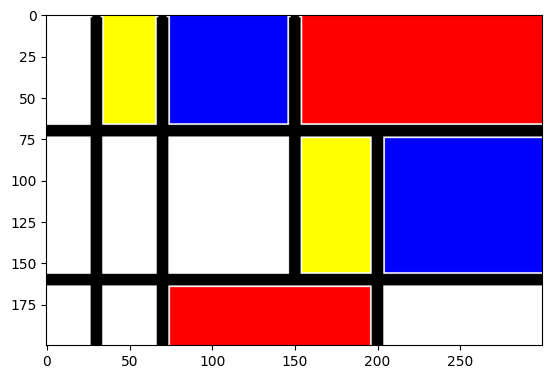

In [15]:

alto = 200 
ancho = 300                        
color_img = np.ones((alto, ancho, 3), dtype=np.uint8) * 255  # Imagen blanca: array h×w×3 con valores 255 (uint8)

cv2.line(color_img, (int(ancho/2) -120, 2), (int(ancho/2) -120, alto), (0,0,0), 5) # primera línea vertical a la izquierda
cv2.line(color_img, (int(ancho/2) -80, 2), (int(ancho/2) -80, alto), (0,0,0), 5)   # segunda línea vertical a la izquierda  
cv2.line(color_img, (int(ancho/2) , 2), (int(ancho/2), alto-40), (0,0,0), 5)       # Línea vertical central
cv2.line(color_img, (int(ancho/2)+50 , 74), (int(ancho/2) +50, alto), (0,0,0), 5)  # Línea vertical a la derecha del centro

cv2.line(color_img, (0, int(alto/2) -30), (ancho, int(alto/2) -30), (0,0,0), 5)    # primera línea horizontal
cv2.line(color_img, (0, int(alto/2) +60), (ancho, int(alto/2) +60), (0,0,0), 5)    # segunda línea horizontal

cv2.rectangle(color_img, (35,65), (65,00), (255,255,0), -1)    # Rectángulo lleno cian en BGR; grosor -1 = relleno
cv2.rectangle(color_img, (75,65), (145,0), (0,0,255), -1)      # Rectángulo lleno rojo  
cv2.rectangle(color_img, (155,65), (ancho,0), (255,0,0), -1)   # Rectángulo lleno azul 
cv2.rectangle(color_img, (205,155), (ancho,75), (0,0,255), -1) # Rectángulo lleno rojo en la franja central
cv2.rectangle(color_img, (155,155), (195,75), (255,255,0), -1) # Rectángulo lleno cian 
cv2.rectangle(color_img, (75,alto), (195,165), (255,0,0), -1)  # Rectángulo lleno azul en la parte inferior

# Dimensiones
print(color_img.shape)            

plt.imshow(color_img)              
plt.show()
 


TAREA 3: Modifica de forma libre los valores de un plano de la imagen

In [16]:
# Abre la webcam (índice 0) usando el backend AVFoundation (recomendado en macOS)
vid = cv2.VideoCapture(0)

try:
    while True:      # Bucle principal: procesa un frame a la vez
        # Lee un frame de la webcam:
        #  - ret  = True si la lectura fue exitosa
        #  - frame= imagen a color (BGR) tipo uint8
        ret, frame = vid.read()

        if ret:  # Si el frame es válido, procedo
            # --- Separación de los canales (OpenCV usa orden BGR) ---
            # r = canal rojo (índice 2), g = verde (1), b = azul (0)
            r = frame[:, :, 2]
            g = frame[:, :, 1]
            b = frame[:, :, 0]

            # --- Dimensiones del frame (antes de crear gradientes/ruido) ---
            # h = altura (filas), w = anchura (columnas)
            h, w = r.shape

            # --- Gradiente horizontal y suma saturada en el canal verde ---
            # Crea un vector de 0 a 255 a lo largo del eje horizontal (w columnas)
            # y lo replica por h filas → matriz h×w de tipo uint8
            gradient = np.tile(np.linspace(0, 255, w, dtype=np.uint8), (h, 1))
            # Suma con saturación 0..255 (cv2.add hace saturación, evita overflow)
            g = cv2.add(g, gradient)

            # --- Ruido aditivo en el canal rojo ---
            # Genera ruido uniforme entero en [0, 200) con la misma shape que r
            noise = np.random.randint(0, 200, r.shape, dtype=np.uint8)
            # Suma saturada (clipping 0..255)
            r = cv2.add(r, noise)

            # --- Pone a cero la mitad izquierda del canal azul ---
            # Todas las columnas de 0 a w//2 se ponen a 0 (negro)
            b[:, :w // 2] = 0

            # --- Collage horizontal de los tres planos ---
            # Concatena los tres canales como imágenes 2D lado a lado → (h × 3w) de un solo canal
            # (se visualizarán en escala de grises, uno al lado del otro)
            collage = np.hstack((r, g, b))
    
            # --- Visualización ---
            # Redimensiona para que quepa en pantalla (factores puramente indicativos)
            # INTER_NEAREST mantiene el efecto "pixel" del collage
            cv2.imshow('RGB', cv2.resize(collage,
                                         (int(w * 1.5), int(h / 2)),
                                         interpolation=cv2.INTER_NEAREST))
    
        # Sal del bucle cuando se presiona ESC (código 27)
        if cv2.waitKey(20) == 27:
            break

finally:  
    # Libera el objeto de captura (webcam)
    vid.release()
    # Cierra todas las ventanas creadas por OpenCV
    cv2.destroyAllWindows()
    # Flush de eventos de UI (útil en macOS para evitar ventanas "congeladas")
    cv2.waitKey(1)


TAREA 4.1:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 

In [17]:
# Abre la webcam de índice 0 usando el backend AVFoundation (recomendado en macOS)
vid = cv2.VideoCapture(0)

try:
    while True:  # Bucle principal: procesa un frame a la vez
        # Lee un frame de la webcam:
        #  - ret: True si la lectura fue exitosa
        #  - frame: imagen BGR (array de NumPy) a color
        ret, frame = vid.read()

        if ret:  # Si el frame es válido, procede
            # Convierte el frame a escala de grises (1 canal) para simplificar los cálculos
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # Encuentra:
            #  - minVal / maxVal: valores de intensidad min/max (0..255)
            #  - minLoc / maxLoc: posiciones (x,y) de los píxeles más oscuro/ más claro
            minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(gray)

            # Dibuja un círculo sobre el píxel más oscuro (BGR: rojo = (0,0,255))
            cv2.circle(frame, minLoc, 10, (0, 0, 255), 2)

            # Dibuja un círculo sobre el píxel más claro (BGR: verde = (0,255,0))
            cv2.circle(frame, maxLoc, 10, (0, 255, 0), 2)

            # Muestra el frame anotado en una ventana llamada 'Vid'
            cv2.imshow('Vid', frame)

        # Sale del bucle si se presiona ESC (código 27)
        if cv2.waitKey(20) == 27:
            break

finally:
    # Libera la webcam
    vid.release()
    # Cierra todas las ventanas de OpenCV
    cv2.destroyAllWindows()
    # “Flush” de eventos UI (útil en macOS para evitar ventanas congeladas)
    cv2.waitKey(1)



TAREA 4.2: ¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [18]:
# Abre la webcam de índice 0 usando el backend AVFoundation (recomendado en macOS)
vid = cv2.VideoCapture(0)

try:
    while True:  # Bucle principal: procesa un frame a la vez
        # Lee un frame de la webcam:
        #  - ret: True si la lectura fue exitosa
        #  - frame: imagen a color en formato BGR (array de NumPy)
        ret, frame = vid.read()

        if ret:  # Si el frame es válido, procede
            # Convierte la imagen a color (BGR) a escala de grises (1 canal)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # Dimensiones de la imagen en gris: h = filas (alto), w = columnas (ancho)
            h, w = gray.shape

            # Lado del bloque a analizar (8x8 píxeles)
            block_size = 8

            # Inicializa los mejores valores de media:
            #  - best_min empieza desde el máximo (255) para que cualquier media menor lo reemplace
            #  - best_max empieza desde 0 para que cualquier media mayor lo reemplace
            best_min = 255
            best_max = 0

            # Posiciones (x, y) de los centros de los bloques con media mínima y máxima
            pos_min, pos_max = (0, 0), (0, 0)

            # Escaneo de la imagen en pasos de 8 píxeles tanto vertical (y) como horizontal (x)
            for y in range(0, h, block_size):
                for x in range(0, w, block_size):
                    # Extrae el bloque 8x8 (en los bordes puede ser más pequeño, pero .mean() funciona igual)
                    block = gray[y:y + block_size, x:x + block_size]

                    # Calcula la luminancia media del bloque
                    mean_val = block.mean()

                    # Actualiza el bloque más oscuro (media más baja)
                    if mean_val < best_min:
                        best_min = mean_val
                        # Centro del bloque: esquina superior izquierda + mitad del lado
                        pos_min = (x + block_size // 2, y + block_size // 2)

                    # Actualiza el bloque más claro (media más alta)
                    if mean_val > best_max:
                        best_max = mean_val
                        pos_max = (x + block_size // 2, y + block_size // 2)

            # Dibuja un círculo en el centro del bloque más oscuro
            # Nota: los colores están en BGR → (255, 0, 0) = azul
            cv2.circle(frame, pos_min, 15, (255, 255, 0), 2)

            # Dibuja un círculo en el centro del bloque más claro
            # (0, 0, 255) = rojo en BGR
            cv2.circle(frame, pos_max, 15, (0, 0, 255), 2)

            # Muestra el frame anotado en una ventana llamada 'Vid'
            cv2.imshow('Vid', frame)

        # Sale del bucle si se presiona ESC (código 27)
        if cv2.waitKey(20) == 27:
            break

finally:
    # Libera la webcam
    vid.release()
    # Cierra todas las ventanas de OpenCV
    cv2.destroyAllWindows()
    # “Flush” de eventos UI (útil en macOS para evitar ventanas congeladas)
    cv2.waitKey(1)


TAREA 5: Llevar a cabo una propuesta propia de pop art

In [ ]:
vid = cv2.VideoCapture(0)

# Dimensiones de la cámara 
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))    # ancho del frame de la fuente
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))   # alto del frame de la fuente

# Reduce la resolución a la mitad para no ocupar demasiada pantalla
w = int(w / 2)
h = int(h / 2)
# Nota: en macOS muchas veces estos set no tienen efecto (depende del driver)
vid.set(cv2.CAP_PROP_FRAME_WIDTH,  w)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

# Crea un collage 2x2 
collage = np.zeros((h * 2, w * 2, 3), dtype=np.uint8)

# Crea 4 ventanas
tl = collage[0:h,     0:w   ]  # superior-izquierda
tr = collage[0:h,     w:2*w ]  # superior-derecha
bl = collage[h:2*h,   0:w   ]  # inferior-izquierda
br = collage[h:2*h,   w:2*w ]  # inferior-derecha

try:
    while True:
        # Lee un frame de la webcam:
        #  - ret = True si la lectura fue exitosa
        #  - frameIN = imagen BGR (uint8)
        ret, frameIN = vid.read()
        if not ret:
            break

        # Redimensiona el frame a la resolución objetivo (w, h)
        frame = cv2.resize(frameIN, (w, h), interpolation=cv2.INTER_NEAREST)

        # Separa los canales (OpenCV usa BGR)
        b = frame[:, :, 0]   # canal Azul
        g = frame[:, :, 1]   # canal Verde
        r = frame[:, :, 2]   # canal Rojo

        tl[:, :, 0] = 255 - g # B
        tl[:, :, 1] = r # G
        tl[:, :, 2] = 100 - b # R  

        tr[:, :, 0] = r 
        tr[:, :, 1] = 100 - b   
        tr[:, :, 2] = 255 - g 

        bl[:, :, 0] = b               
        bl[:, :, 1] = 255 - r         
        bl[:, :, 2] = 120 - g          

        br[:, :, 0] = 255 - r         
        br[:, :, 1] = 100 - g         
        br[:, :, 2] = b               

        # Muestra el collage 2x2
        cv2.imshow('Cam', collage)

        # Sale con ESC (código 27)
        if cv2.waitKey(20) == 27:
            break

finally:
    vid.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

